In [1]:
import json
import statistics

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def CreateJsonEntry(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Add commas between lines
    json_str = ",".join(lines)
    # Surround the entire string with square brackets to create a JSON array
    json_str = "[" + json_str + "]"
    # Load the JSON array
    json_entry = json.loads(json_str)
    
    return json_entry

def GetRttList(json_entry, first_rtt_set_time):
    latest_rtt_list = []
    for entry in json_entry:
        # Check if the entry has a 'time' field and its value is after 103
        if 'time' in entry and entry['time'] > first_rtt_set_time:
            # Check if the entry has 'name' field and it is "recovery:metrics_updated"
            if 'name' in entry and entry['name'] == 'recovery:metrics_updated':
                data = entry.get('data', {})
                latest_rtt = data.get('latest_rtt')
                
                if latest_rtt is not None:
                    latest_rtt_list.append(latest_rtt)
                    # Print the time and corresponding latest_rtt
                    # print(f"Time: {entry['time']}, Latest RTT: {latest_rtt}")

    return latest_rtt_list

In [60]:
# Open the .qlog file for reading
file_path_wifi = './20240105/log_ea30528f8f8971a62700286f30ee0a_client.qlog'
json_entry_wifi = CreateJsonEntry(file_path_wifi)
latest_rtt_list_wifi = GetRttList(json_entry_wifi, 110)

In [61]:
# Open the .qlog file for reading
file_path_4G_CHT = './20240105_4G_CHT/log_f5134b8b2aafbf5b_client.qlog'
json_entry_4G_CHT = CreateJsonEntry(file_path_4G_CHT)
latest_rtt_list_4G_CHT = GetRttList(json_entry_4G_CHT, 70)

In [62]:
# Open the .qlog file for reading
file_path4G_TM = './20240105_4G_TM/log_d760c725e7a29a1935fefbf9b5a89d35d4adb0cc_client.qlog'
json_entry_4G_TM = CreateJsonEntry(file_path4G_TM)
latest_rtt_list_4G_TM = GetRttList(json_entry_4G_TM, 110)

In [73]:
# Open the .qlog file for reading
file_path_5G_CHT = './20240105_5G_CHT/log_4f9f643375a62b4b0511693923a6ed47_client.qlog'
json_entry_5G_CHT = CreateJsonEntry(file_path_5G_CHT)
latest_rtt_list_5G_CHT = GetRttList(json_entry_5G_CHT, 47)

In [74]:
# check the number of latest_rtt_list
print(len(latest_rtt_list_wifi))
print(len(latest_rtt_list_4G_CHT))
print(len(latest_rtt_list_4G_TM))
print(len(latest_rtt_list_5G_CHT))

120
120
120
120


In [65]:
# 單位：ms
def PrintStats(rtt_list):
    stdev = statistics.stdev(rtt_list)
    mean = statistics.mean(rtt_list)
    median = statistics.median(rtt_list)
    print("standard deviation:", stdev)
    print("mean:", mean)
    print("median:", median)

In [75]:
print("wifi: ")
PrintStats(latest_rtt_list_wifi)
print("4G_CHT: ")
PrintStats(latest_rtt_list_4G_CHT)
print("4G_TM: ")
PrintStats(latest_rtt_list_4G_TM)
print("5G_CHT: ")
PrintStats(latest_rtt_list_5G_CHT)

wifi: 
standard deviation: 5.276751068816724
mean: 20.347036866666667
median: 19.9138335
4G_CHT: 
standard deviation: 139.09793549955413
mean: 105.87732565833333
median: 82.177458
4G_TM: 
standard deviation: 12.93212013884221
mean: 70.214542375
median: 67.82724999999999
5G_CHT: 
standard deviation: 28.71907226826704
mean: 67.73820976666667
median: 60.869749999999996


In [76]:
q1_list = []
q3_list = []
iqr_list = []
lower_list = []
higher_list = []

def GetIqr(rtt_list):
    q1, q3 = np.percentile(rtt_list, [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    higher_fence = q3 + (1.5*iqr)

    q1_list.append(q1)
    q3_list.append(q3)
    iqr_list.append(iqr)
    lower_list.append(lower_fence)
    higher_list.append(higher_fence)


GetIqr(latest_rtt_list_wifi)
GetIqr(latest_rtt_list_4G_CHT)
GetIqr(latest_rtt_list_4G_TM)
GetIqr(latest_rtt_list_5G_CHT)

for i in range(4):
    if i == 0:
        print("wifi: ")
    if i == 1:
        print("4G_CHT: ") 
    if i == 2:
        print("4G_TM: ") 
    if i == 3:
        print("5G_CHT: ")
    print("q1:", q1_list[i], ", q3:", q3_list[i], ", iqr:", iqr_list[i], ", lower_fence:", lower_list[i], ", higher_fence:", higher_list[i])

wifi: 
q1: 16.755426749999998 , q3: 23.7615205 , iqr: 7.006093750000002 , lower_fence: 6.246286124999996 , higher_fence: 34.270661125000004
4G_CHT: 
q1: 76.360198 , q3: 88.65483325 , iqr: 12.294635249999999 , lower_fence: 57.918245125 , higher_fence: 107.096786125
4G_TM: 
q1: 62.19269825 , q3: 75.236052 , iqr: 13.043353750000001 , lower_fence: 42.627667625 , higher_fence: 94.801082625
5G_CHT: 
q1: 52.795333 , q3: 77.94991675 , iqr: 25.15458375 , lower_fence: 15.063457374999999 , higher_fence: 115.681792375


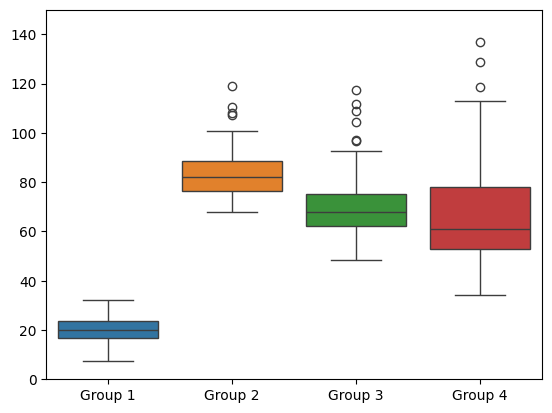

In [84]:
# Assuming latest_rtt_list1, latest_rtt_list2, latest_rtt_list3, and latest_rtt_list4 are your lists
data = {'Group 1': latest_rtt_list_wifi,
        'Group 2': latest_rtt_list_4G_CHT,
        'Group 3': latest_rtt_list_4G_TM,
        'Group 4': latest_rtt_list_5G_CHT}

df1 = pd.DataFrame(data)

# Create a boxplot
sns.boxplot(data=df1)

# Set a custom y-axis limit
plt.ylim(0, 150)  # Adjust the limits based on your data
plt.show()

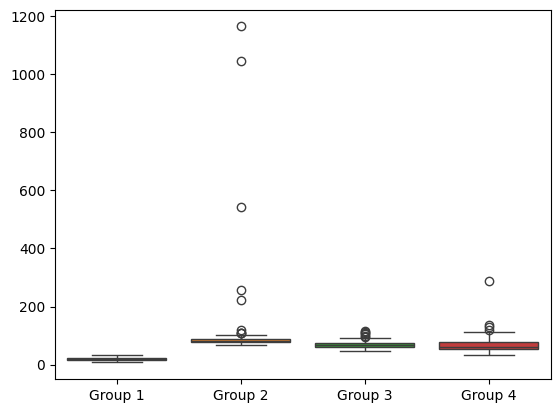

In [85]:
# Assuming latest_rtt_list1, latest_rtt_list2, latest_rtt_list3, and latest_rtt_list4 are your lists
data = {'Group 1': latest_rtt_list_wifi,
        'Group 2': latest_rtt_list_4G_CHT,
        'Group 3': latest_rtt_list_4G_TM,
        'Group 4': latest_rtt_list_5G_CHT}

df1 = pd.DataFrame(data)

# Create a boxplot
sns.boxplot(data=df1)
plt.show()

## TCP Transmission RTT
This section is for QUIC and TCP transmission round-trip time comparison.

In [238]:
# Open the .qlog file for reading
file_path1 = './20240110/log_c387431093ec0a8231085e15b68298dabd64_client.qlog'
json_entry1 = CreateJsonEntry(file_path1)
latest_rtt_list1 = GetRttList(json_entry1, 70)
print(len(latest_rtt_list1))

file_path2 = './20240110/log_c05b65d9bea13833700a8ed8323a879be5_client.qlog'
json_entry2 = CreateJsonEntry(file_path2)
latest_rtt_list2 = GetRttList(json_entry2, 29)
print(len(latest_rtt_list2))

file_path3 = './20240110/log_38c3a32f62b8ff737f9322_client.qlog'
json_entry3 = CreateJsonEntry(file_path3)
latest_rtt_list3 = GetRttList(json_entry3, 1)
latest_rtt_list3.append(20)
print(len(latest_rtt_list3))

120
120
120


In [239]:
latest_rtt_list = []
# for i in range(len(latest_rtt_list1)):
#     latest_rtt_list.append(latest_rtt_list1[i])
# for i in range(len(latest_rtt_list2)):
#     latest_rtt_list.append(latest_rtt_list2[i])
for i in range(len(latest_rtt_list3)):
    latest_rtt_list.append(latest_rtt_list3[i])
PrintStats(latest_rtt_list)

standard deviation: 89.899281967091
mean: 128.88559239166668
median: 111.840771


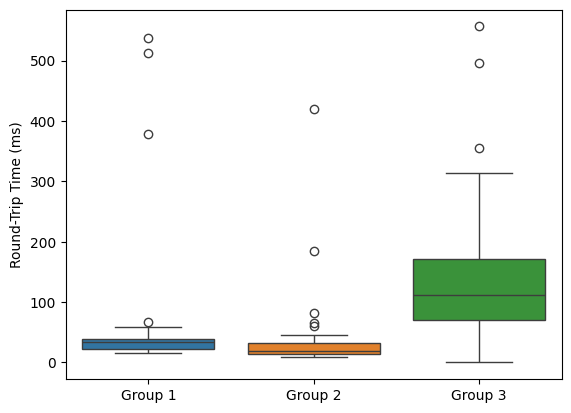

In [240]:
data = {'Group 1': latest_rtt_list1,
        'Group 2': latest_rtt_list2,
        'Group 3': latest_rtt_list3,
        }

df1 = pd.DataFrame(data)

# Create a boxplot
sns.boxplot(data=df1)
# plt.ylim(0, 120)
plt.ylabel('Round-Trip Time (ms)')
plt.show()

In [232]:
df1 = pd.read_csv("./20240110/capturetcp_c_20240110_pcap_6.csv", sep='@')
cond_s1 = df1['ip.src'] == '192.168.1.78'
df_s1 = df1[cond_s1]
cond_c1 = df1['ip.src'] == '192.168.1.79'
df_c1  = df1[cond_c1]

cond_ack1 = ~df_s1['tcp.analysis.acks_frame'].isna()
df_s_ack1 = df_s1[cond_ack1]


df2 = pd.read_csv("./20240110/capturetcp_c_20240110_pcap_2.csv", sep='@')
cond_s2 = df2['ip.src'] == '192.168.1.78'
df_s2 = df2[cond_s2]
cond_c2 = df2['ip.src'] == '192.168.1.79'
df_c2  = df2[cond_c2]

cond_ack2 = ~df_s2['tcp.analysis.acks_frame'].isna()
df_s_ack2 = df_s2[cond_ack2]


df3 = pd.read_csv("./20240110/capturetcp_c_20231116_pcap.csv", sep='@')
cond_s3 = df3['ip.src'] == '192.168.1.78'
df_s3 = df3[cond_s3]
cond_c3 = df3['ip.src'] == '192.168.1.79'
df_c3  = df3[cond_c3]

cond_ack3 = ~df_s3['tcp.analysis.acks_frame'].isna()
df_s_ack3 = df_s3[cond_ack3]

print(len(df_s_ack1))
print(len(df_s_ack2))
print(len(df_s_ack3))

121
122
121


In [233]:
rtt_list = []
for i in range(len(df_s_ack1)-1):
    rtt_list.append((df_s_ack1['tcp.analysis.ack_rtt'].iloc[i])*1000)
# for i in range(len(df_s_ack2)-2):
#     rtt_list.append((df_s_ack2['tcp.analysis.ack_rtt'].iloc[i])*1000)
# for i in range(len(df_s_ack3)-1):
#     rtt_list.append((df_s_ack1['tcp.analysis.ack_rtt'].iloc[i])*1000)

print(len(rtt_list))

120


In [216]:
q1, q3 = np.percentile(rtt_list, [25, 75])
iqr = q3 - q1

lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

print(q1, q3, iqr, lower_fence, higher_fence)
PrintStats(rtt_list)

11.48175 24.358249999999998 12.876499999999998 -7.832999999999997 43.672999999999995
standard deviation: 17.57651717335087
mean: 21.497733333333333
median: 15.649999999999999


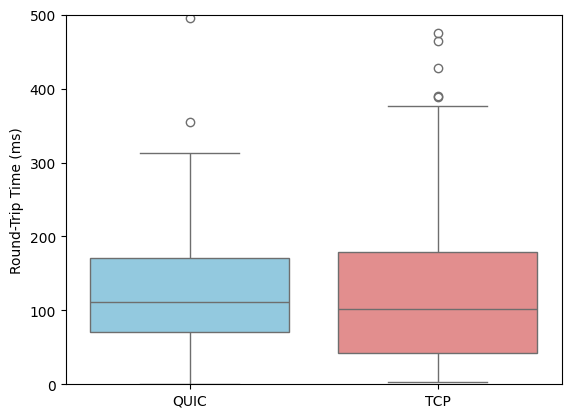

In [246]:
# sns.boxplot(rtt_list)
data = {'QUIC': latest_rtt_list,
        'TCP': rtt_list}

df1 = pd.DataFrame(data)

# Create a boxplot
# sns.boxplot(data=df1)
sns.boxplot(data=df1, palette=['skyblue', 'lightcoral'])
plt.ylim(0, 500)
plt.ylabel('Round-Trip Time (ms)')
plt.savefig('rtt_boxplot.png')
plt.show()
